# **EXOPLANETAS**

In [1]:
import numpy as np
import pandas as pd

# Using pandas library, read the file "exoplanets.csv"
df = pd.read_csv('data/exoplanets.csv')

# Print the first 5 rows of the dataframe
df.head()

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,11473000.0,3.478097e+25,1.80,YES,YES,35.8,YES,50.5,NO
1,10440000.0,2.620465e+25,1.64,NO,NO,34.5,NO,30.5,NO
2,12520000.0,4.518792e+25,1.96,YES,YES,42.1,YES,12.3,YES
3,11727000.0,3.714528e+25,1.84,YES,YES,39.0,NO,24.5,NO
4,7285000.0,8.903243e+24,1.14,NO,NO,9.3,NO,32.7,NO


<AxesSubplot:ylabel='Frequency'>

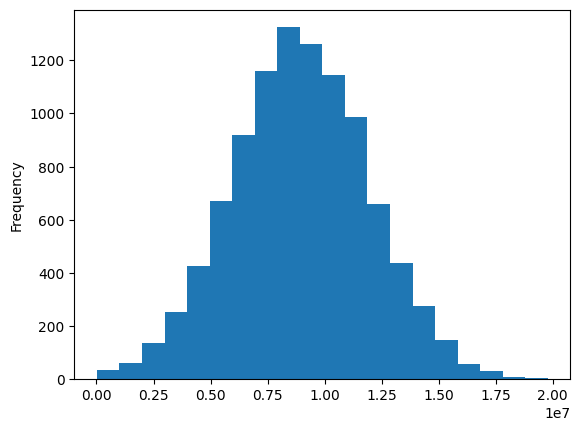

In [2]:
# Plot histogram of the column "radius (m)" (use 20 bins)
df['radius (m)'].plot.hist(bins=20)

Dividimos los conjuntos en cuantiles.

In [3]:
# Create three categories for the column "radius (m)" in three quantiles
df['radius (m)'] = pd.qcut(df['radius (m)'], 3, labels=['small', 'medium', 'large'])

# Create three categories for the column "mass (kg)" in three quantiles
df['mass (kg)'] = pd.qcut(df['mass (kg)'], 3, labels=['small', 'medium', 'large'])

# Create three categories for the column "gravity" in three quantiles
df['gravity'] = pd.qcut(df['gravity'], 3, labels=['weak', 'medium', 'strong'])

# Create three categories for the column "avg_temp (C)" in three quantiles
df['avg_temp (C)'] = pd.qcut(df['avg_temp (C)'], 3, labels=['cold', 'medium', 'hot'])

# Create three categories for the column "rotational_period (h)" in three quantiles
df['rotational_period (h)'] = pd.qcut(df['rotational_period (h)'], 3, labels=['slow', 'medium', 'fast'])

In [4]:
df.head()

,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
0,large,large,strong,YES,YES,cold,YES,fast,NO
1,large,large,strong,NO,NO,cold,NO,medium,NO
2,large,large,strong,YES,YES,medium,YES,slow,YES
3,large,large,strong,YES,YES,medium,NO,slow,NO
4,small,small,weak,NO,NO,cold,NO,medium,NO


In [5]:
import bnlearn as bn
DAG = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [6]:
# print adjacency matrix
print(DAG['adjmat'])



target                 radius (m)  mass (kg)  gravity  atmosphere  oxygene  \
source                                                                       
radius (m)                  False       True    False       False    False   
mass (kg)                   False      False    False       False    False   
gravity                      True      False    False       False    False   
atmosphere                  False      False     True       False     True   
oxygene                     False      False    False       False    False   
avg_temp (C)                False      False    False       False    False   
water                       False      False    False        True     True   
rotational_period (h)       False      False    False       False    False   
life                        False      False    False        True     True   

target                 avg_temp (C)  water  rotational_period (h)   life  
source                                                            

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'radius (m)': array([ 0.35895496, -0.62788647]),
  'mass (kg)': array([ 0.25682601, -0.77387208]),
  'gravity': array([ 0.38053981, -0.40644052]),
  'atmosphere': array([0.13933432, 0.29535245]),
  'oxygene': array([-0.1099307,  1.       ]),
  'avg_temp (C)': array([-0.43293372, -0.67736918]),
  'water': array([0.05626577, 0.66650356]),
  'rotational_period (h)': array([-0.63476537, -0.11853809]),
  'life': array([-0.01429108,  0.64225033])},
 'G': <networkx.classes.digraph.DiGraph at 0x142b47070>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'rota

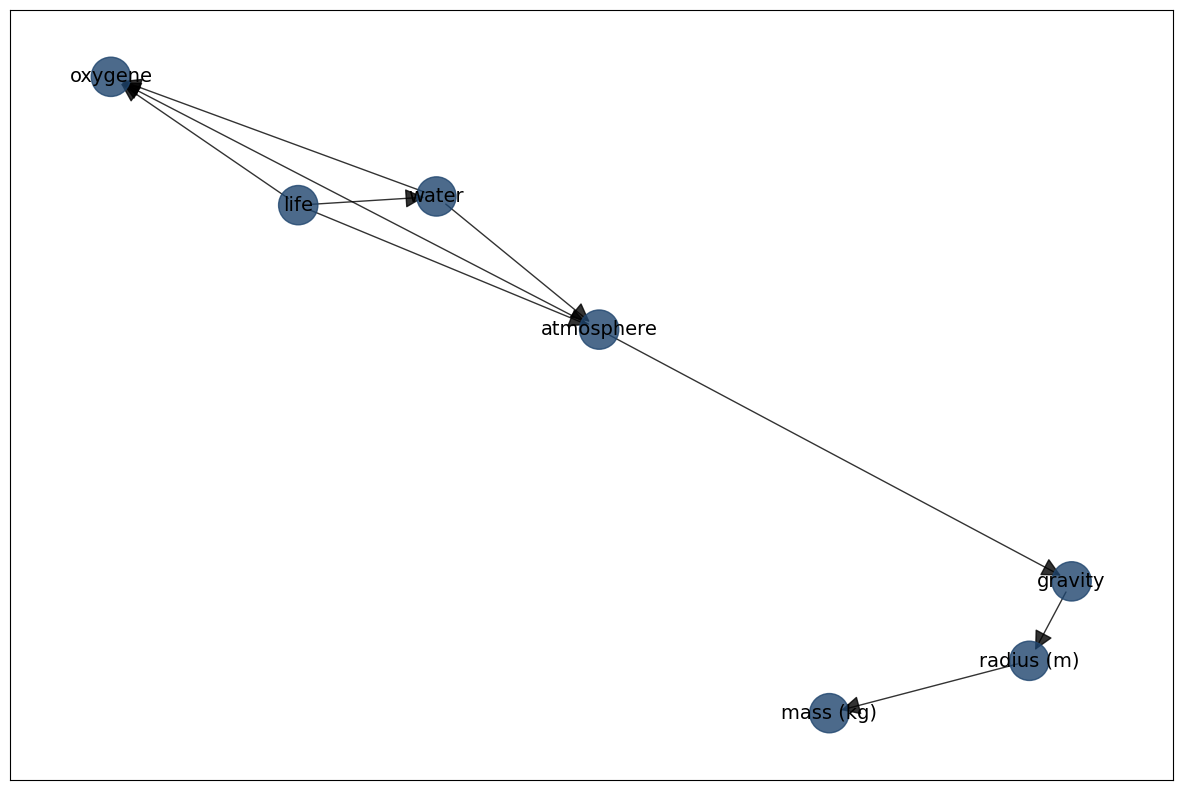

In [7]:
# bn.plot(DAG, interactive=True, params_interactive={'notebook':True})
bn.plot(DAG)

Podemos modificar manualmente los arcos del grafo si lo deseamos.

In [8]:
DAG['adjmat'] # La matriz de adyacencia es un dataframe de pandas

target,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
source,,,,,,,,,
radius (m),False,True,False,False,False,False,False,False,False
mass (kg),False,False,False,False,False,False,False,False,False
gravity,True,False,False,False,False,False,False,False,False
atmosphere,False,False,True,False,True,False,False,False,False
oxygene,False,False,False,False,False,False,False,False,False
avg_temp (C),False,False,False,False,False,False,False,False,False
water,False,False,False,True,True,False,False,False,False
rotational_period (h),False,False,False,False,False,False,False,False,False
life,False,False,False,True,True,False,True,False,False


Modificamos el grafo como queramos.

In [9]:
DAG['adjmat'].loc['mass (kg)', 'gravity'] = True
DAG['adjmat'].loc['gravity', 'mass (kg)'] = False

In [10]:
DAG['adjmat']

target,radius (m),mass (kg),gravity,atmosphere,oxygene,avg_temp (C),water,rotational_period (h),life
source,,,,,,,,,
radius (m),False,True,False,False,False,False,False,False,False
mass (kg),False,False,True,False,False,False,False,False,False
gravity,True,False,False,False,False,False,False,False,False
atmosphere,False,False,True,False,True,False,False,False,False
oxygene,False,False,False,False,False,False,False,False,False
avg_temp (C),False,False,False,False,False,False,False,False,False
water,False,False,False,True,True,False,False,False,False
rotational_period (h),False,False,False,False,False,False,False,False,False
life,False,False,False,True,True,False,True,False,False


[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'radius (m)': array([-0.04923428,  0.41699616]),
  'mass (kg)': array([-0.1104793 ,  0.54553624]),
  'gravity': array([0.06807323, 0.56459191]),
  'atmosphere': array([-0.02118178, -0.18710011]),
  'oxygene': array([-0.10935793, -0.94441685]),
  'avg_temp (C)': array([ 0.88836018, -0.25891711]),
  'water': array([-0.11147913, -0.5646797 ]),
  'rotational_period (h)': array([-0.5217348,  1.       ]),
  'life': array([-0.0329662 , -0.57201054])},
 'G': <networkx.classes.digraph.DiGraph at 0x29026e9e0>,
 'node_properties': {'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'ro

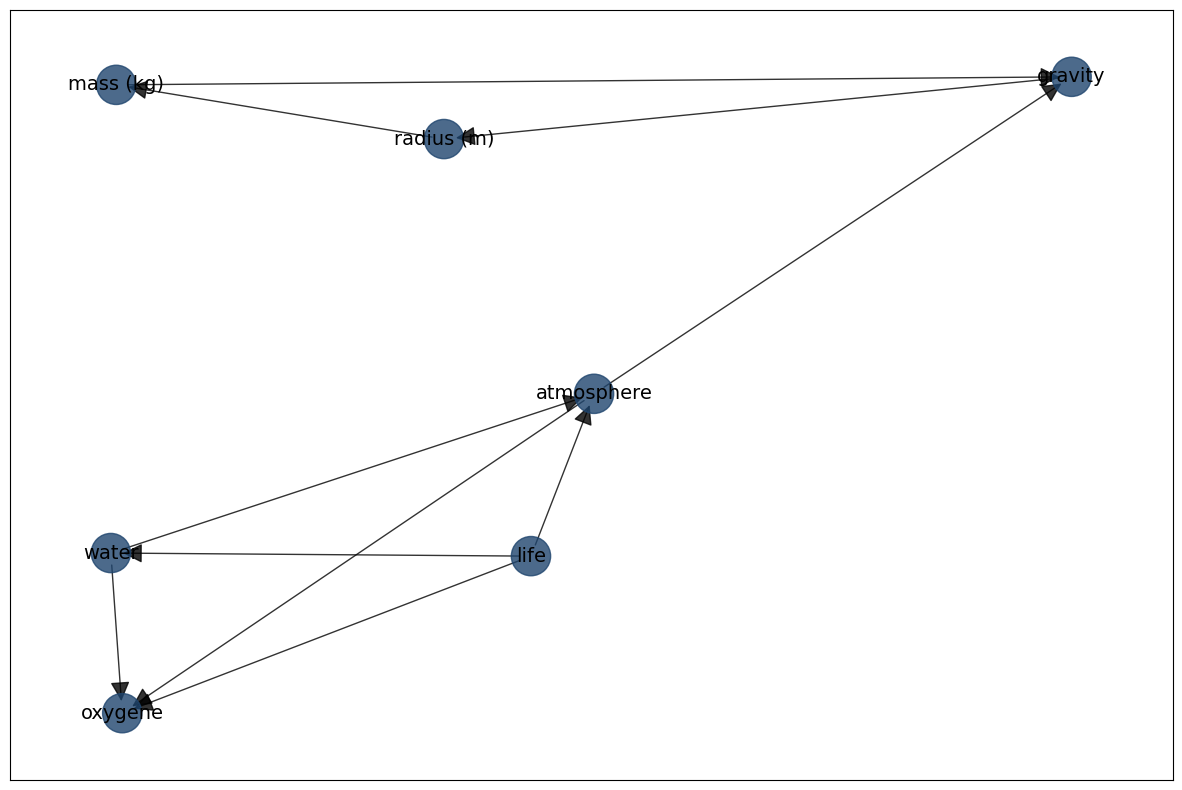

In [11]:
bn.plot(DAG)

Si no estamos conformes con el grafo, podemos crearlo manualmente completamente desde cero.

[bnlearn] >bayes DAG created.
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


{'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'mass (kg)': array([-1.        ,  0.64191129]),
  'gravity': array([-0.45027279,  0.46661207]),
  'radius (m)': array([-0.83840756,  0.33901398]),
  'atmosphere': array([0.04428099, 0.22345598]),
  'oxygene': array([ 0.3397238 , -0.38847205]),
  'water': array([ 0.54940806, -0.30463035]),
  'avg_temp (C)': array([ 0.4800832 , -0.16970952]),
  'life': array([ 0.87518431, -0.8081814 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x29029ddb0>,
 'node_properties': {'mass (kg)': {'node_color': '#1f456e', 'node_size': 800},
  'gravity': {'node_color': '#1f456e', 'node_size': 800},
  'radius (m)': {'node_color': '#1f456e', 'node_size': 800},
  'atmosphere': {'node_color': '#1f456e', 'node_size': 800},
  'oxygene': {'node_color': '#1f456e', 'node_size': 800},
  'water': {'node_color': '#1f456e', 'node_size': 800},
  'avg_temp (C)': {'node_color': '#1f456e', 'node_size': 800},
  'life': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_pr

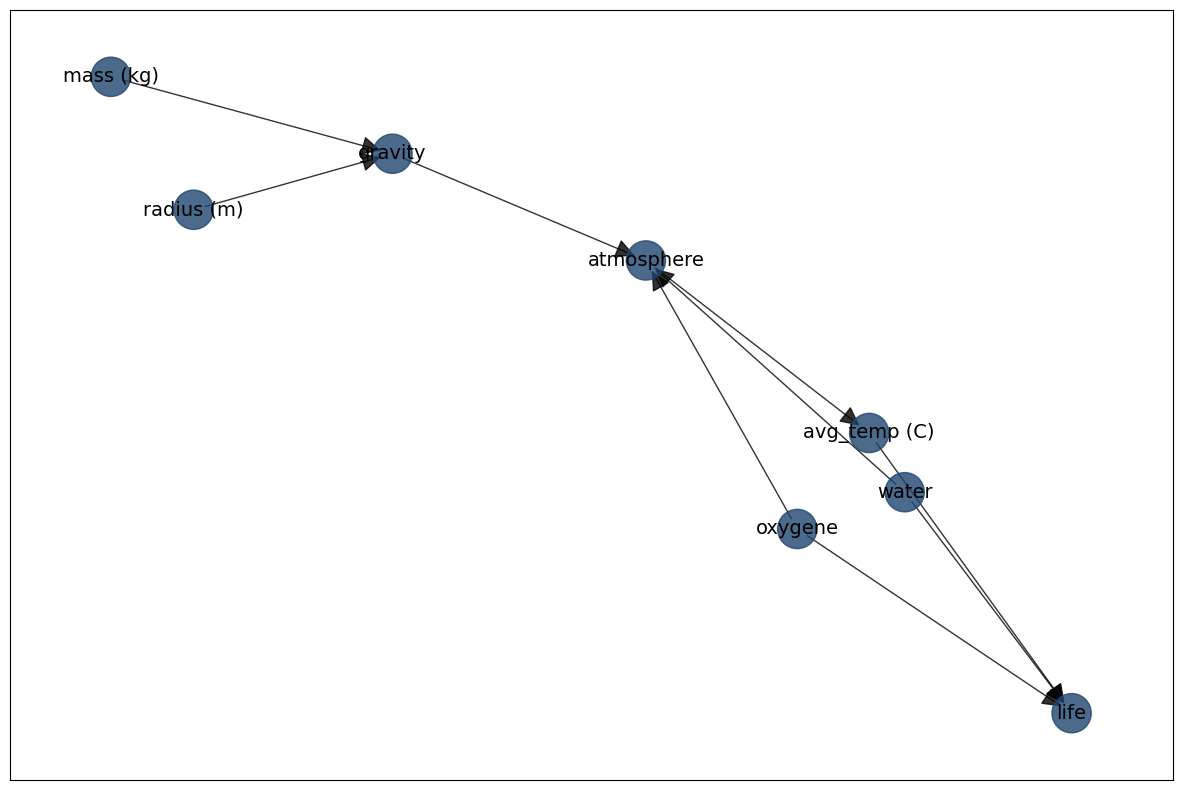

In [12]:
# Define the network structure
edges = [('mass (kg)', 'gravity'),
          ('radius (m)', 'gravity'),
          ('gravity', 'atmosphere'),
          ('oxygene', 'atmosphere'),
          ('water', 'atmosphere'),
          ('atmosphere', 'avg_temp (C)'),
          ('avg_temp (C)', 'life'),
          ('oxygene', 'life'),
          ('water', 'life')]
          
# Make the actual Bayesian DAG
DAG_life = bn.make_DAG(edges)

bn.plot(DAG_life)

No hemos incluido el periodo rotacional, así que eliminamos esa columna de la tabla antes de calcular las tablas condicionadas.

In [13]:
# Eliminate the column "rotational_period (h)" from the dataframe
df = df.drop('rotational_period (h)', axis=1)

In [14]:
model = bn.parameter_learning.fit(DAG_life, df, methodtype='maximumlikelihood')

[bnlearn] >Parameter learning> Computing parameters using [maximumlikelihood]
[bnlearn] >CPD of mass (kg):
+-------------------+--------+
| mass (kg)(large)  | 0.3333 |
+-------------------+--------+
| mass (kg)(medium) | 0.3333 |
+-------------------+--------+
| mass (kg)(small)  | 0.3334 |
+-------------------+--------+
[bnlearn] >CPD of gravity:
+-----------------+-----+-------------------+
| mass (kg)       | ... | mass (kg)(small)  |
+-----------------+-----+-------------------+
| radius (m)      | ... | radius (m)(small) |
+-----------------+-----+-------------------+
| gravity(medium) | ... | 0.0               |
+-----------------+-----+-------------------+
| gravity(strong) | ... | 0.0               |
+-----------------+-----+-------------------+
| gravity(weak)   | ... | 1.0               |
+-----------------+-----+-------------------+
[bnlearn] >CPD of radius (m):
+--------------------+--------+
| radius (m)(large)  | 0.3333 |
+--------------------+--------+
| radius (m)(medi

Hacemos algnas inferencias sobre el grafo.

In [63]:
# q = bn.inference.fit(model, variables=['life'], evidence={'oxygene':1, 'gravity':'medium', 'mass (kg)':'medium', 'radius (m)':'medium', 'avg_temp (C)':'cold'})
# q = bn.inference.fit(model, variables=['life'], evidence={'oxygene': 'YES'})
q = bn.inference.fit(model, variables=['mass (kg)'], evidence={'gravity': 'strong'})
print(q)

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+-------------+----------+
|    |   mass (kg) |        p |
+====+=============+==========+
|  0 |           0 | 0.554401 |
+----+-------------+----------+
|  1 |           1 | 0.222783 |
+----+-------------+----------+
|  2 |           2 | 0.222816 |
+----+-------------+----------+
+-------------------+------------------+
| mass (kg)         |   phi(mass (kg)) |
+===================+==================+
| mass (kg)(large)  |           0.5544 |
+-------------------+------------------+
| mass (kg)(medium) |           0.2228 |
+-------------------+------------------+
| mass (kg)(small)  |           0.2228 |
+-------------------+------------------+
